# Task
use this data set to visualize time series data

Here is all the data you need:
"BTC-USD.csv"

## Data loading

### Subtask:
Load the "BTC-USD.csv" file into a Pandas DataFrame.


**Reasoning**:
I need to load the "BTC-USD.csv" file into a pandas DataFrame and store it in a variable named `df`.



In [5]:
import pandas as pd

try:
    df = pd.read_csv('BTC-USD.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'BTC-USD.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    df = None

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-26,237.104004,238.242004,235.692001,237.115997,237.115997,16425000.0
1,2015-05-27,237.065002,238.636002,236.695007,237.283005,237.283005,18837000.0
2,2015-05-28,237.257004,237.824005,236.651993,237.408005,237.408005,13829600.0
3,2015-05-29,237.376999,237.522003,235.731003,237.095993,237.095993,14805000.0
4,2015-05-30,237.091995,237.093002,232.046005,233.345001,233.345001,14098600.0


## Data exploration

### Subtask:
Explore the loaded DataFrame `df`.


**Reasoning**:
Explore the DataFrame `df` by checking data types, missing values, and descriptive statistics.  This involves using `.dtypes`, `.isnull().sum()`, `.shape`, `.info()`, and `.describe()`.  I will also pay special attention to the 'Date' and 'Close' columns.



In [6]:
# Check data types
print("Data types:\n", df.dtypes)

# Identify and count missing values
print("\nMissing values:\n", df.isnull().sum())

# Examine the overall structure
print("\nDataFrame shape:\n", df.shape)
print("\nDataFrame info:\n")
df.info()
print("\nDataFrame describe:\n", df.describe())

# Further examine the 'Date' and 'Close' columns
print("\n'Date' column unique values:\n", df['Date'].unique())
print("\n'Close' column value counts:\n", df['Close'].value_counts())

Data types:
 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

Missing values:
 Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

DataFrame shape:
 (2192, 7)

DataFrame info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2192 non-null   object 
 1   Open       2188 non-null   float64
 2   High       2188 non-null   float64
 3   Low        2188 non-null   float64
 4   Close      2188 non-null   float64
 5   Adj Close  2188 non-null   float64
 6   Volume     2188 non-null   float64
dtypes: float64(6), object(1)
memory usage: 120.0+ KB

DataFrame describe:
                Open          High           Low         Close     Adj Close  \
count   2188.000000   

## Data wrangling

### Subtask:
Convert the 'Date' column in the DataFrame `df` to datetime objects and set it as the DataFrame index. Handle any missing values in the price columns ('Open', 'High', 'Low', 'Close', 'Adj Close').


**Reasoning**:
Convert the 'Date' column to datetime objects, set it as the index, handle missing values in price columns, and verify the changes.



In [7]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as index
df = df.set_index('Date')

# Handle missing values in price columns ('Open', 'High', 'Low', 'Close', 'Adj Close')
# Using forward fill to maintain the time series nature of the data
price_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close']
df[price_cols] = df[price_cols].fillna(method='ffill')

# Verify the changes
display(df.head())
print(df.dtypes)
print(df.isnull().sum())

<ipython-input-7-bf65d5618030>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[price_cols] = df[price_cols].fillna(method='ffill')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-26,237.104004,238.242004,235.692001,237.115997,237.115997,16425000.0
2015-05-27,237.065002,238.636002,236.695007,237.283005,237.283005,18837000.0
2015-05-28,237.257004,237.824005,236.651993,237.408005,237.408005,13829600.0
2015-05-29,237.376999,237.522003,235.731003,237.095993,237.095993,14805000.0
2015-05-30,237.091995,237.093002,232.046005,233.345001,233.345001,14098600.0


Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       4
dtype: int64


**Reasoning**:
The previous code block had a warning about `fillna` method.  Correct the code to use `.ffill()` as suggested by the warning.  Then, re-check for missing values.



In [8]:
# Handle missing values in price columns ('Open', 'High', 'Low', 'Close', 'Adj Close')
# Using forward fill to maintain the time series nature of the data
price_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close']
df[price_cols] = df[price_cols].ffill()

# Verify the changes again
print(df.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       4
dtype: int64


## Data visualization

### Subtask:
Visualize the Bitcoin price over time.


**Reasoning**:
Create the time series plot of the 'Close' price, including the 50-day and 200-day moving averages.



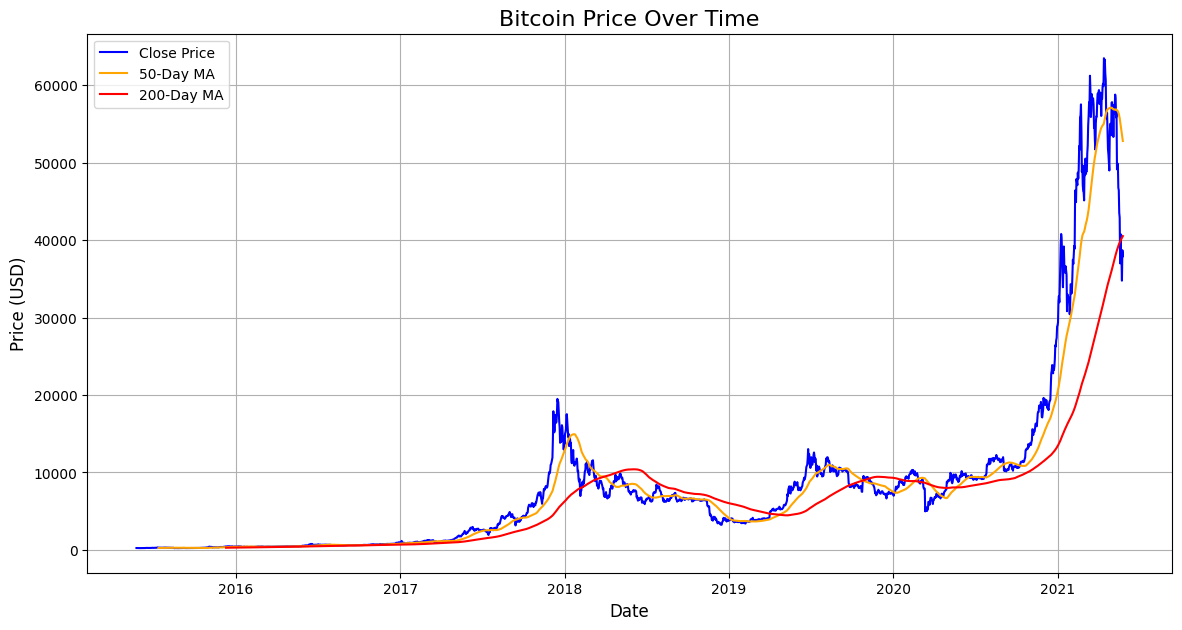

In [9]:
import matplotlib.pyplot as plt

# Plot the 'Close' price
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue')

# Calculate and plot moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()
plt.plot(df['MA50'], label='50-Day MA', color='orange')
plt.plot(df['MA200'], label='200-Day MA', color='red')

# Customize the plot
plt.title('Bitcoin Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

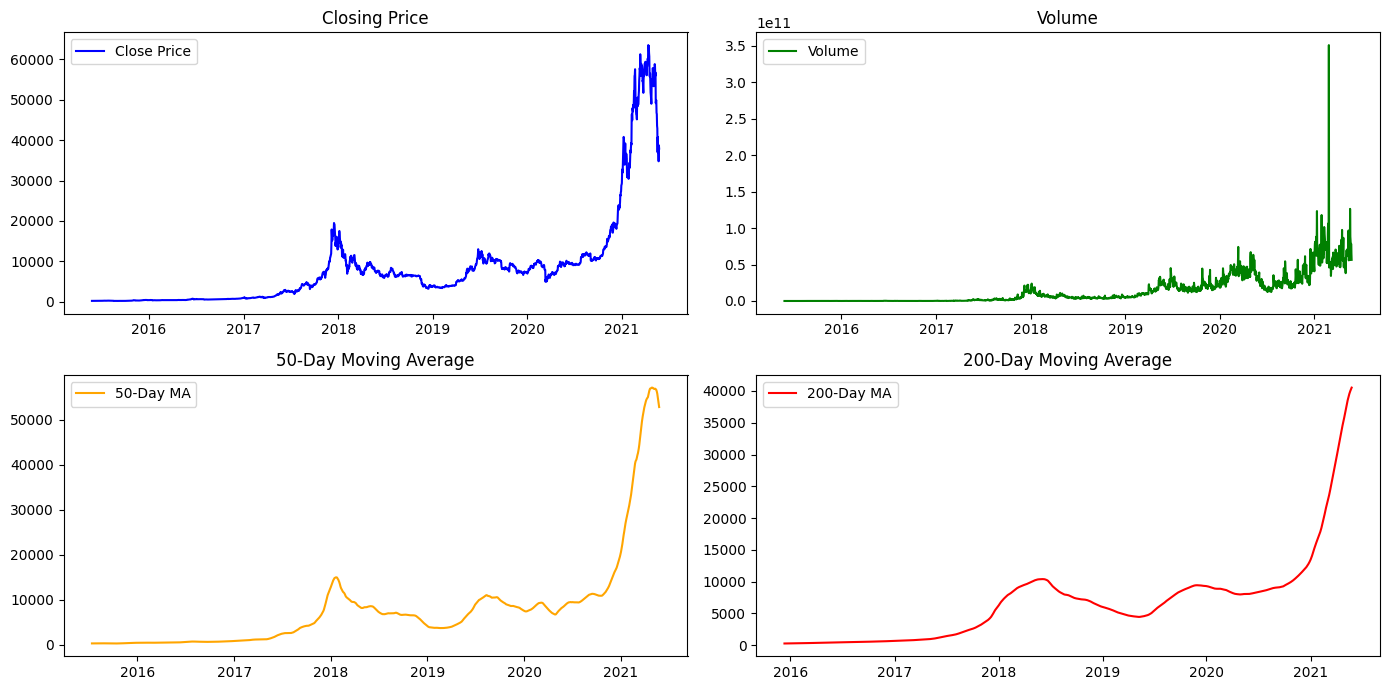

In [10]:
import matplotlib.pyplot as plt

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 7))  # This line is added to create subplots

# Subplot 1: Closing Price
axes[0, 0].plot(df['Close'], label='Close Price', color='blue')
axes[0, 0].set_title('Closing Price')
axes[0, 0].legend()

# Subplot 2: Volume
axes[0, 1].plot(df['Volume'], label='Volume', color='green')
axes[0, 1].set_title('Volume')
axes[0, 1].legend()

# Subplot 3: 50-Day Moving Average
axes[1, 0].plot(df['MA50'], label='50-Day MA', color='orange')
axes[1, 0].set_title('50-Day Moving Average')
axes[1, 0].legend()

# Subplot 4: 200-Day Moving Average
axes[1, 1].plot(df['MA200'], label='200-Day MA', color='red')
axes[1, 1].set_title('200-Day Moving Average')
axes[1, 1].legend()

# Adjust layout and display the plot
plt.tight_layout()  # Prevents overlapping of subplots
plt.show()

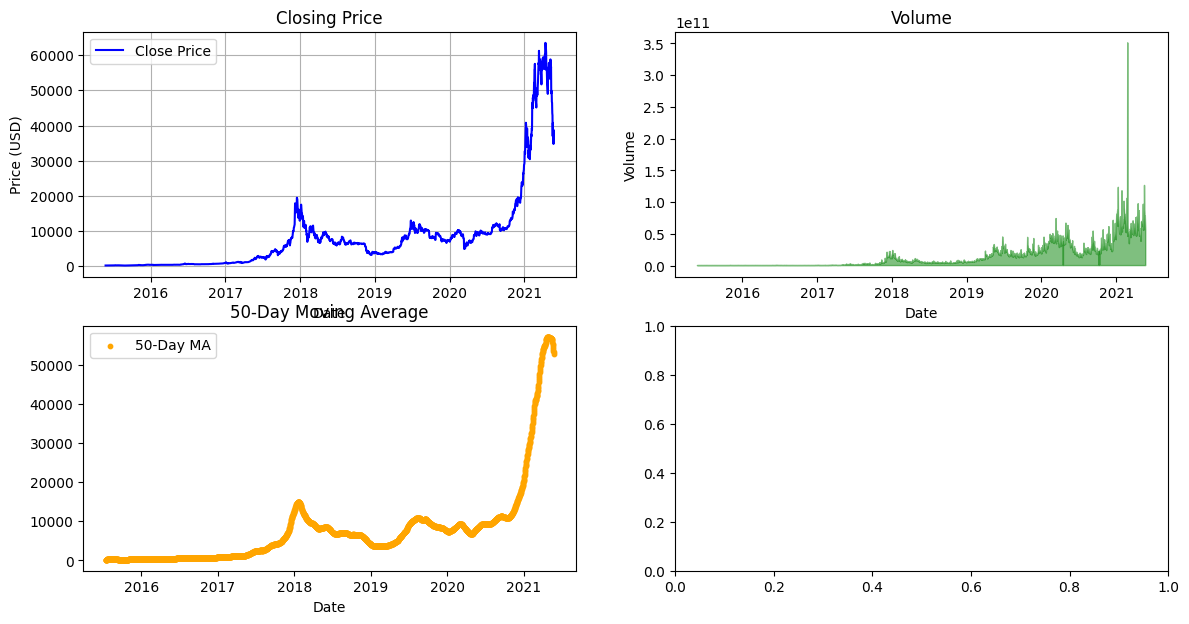

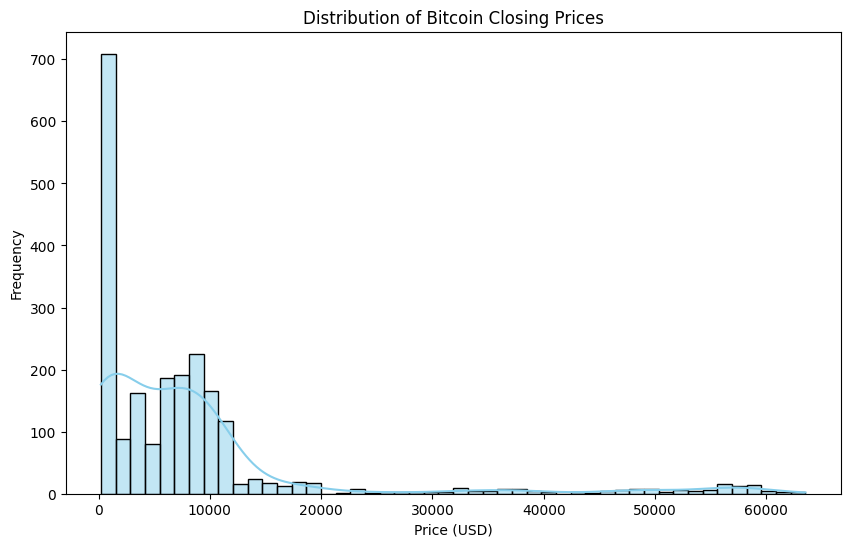

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# --- Matplotlib with subplots and customizations ---
fig, axes = plt.subplots(2, 2, figsize=(14, 7))

# Subplot 1: Closing Price with grid and labels
axes[0, 0].plot(df['Close'], label='Close Price', color='blue')
axes[0, 0].set_title('Closing Price')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price (USD)')
axes[0, 0].grid(True)
axes[0, 0].legend()

# Subplot 2: Volume with area chart
axes[0, 1].fill_between(df.index, df['Volume'], color='green', alpha=0.5)  # Area chart
axes[0, 1].set_title('Volume')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Volume')

# Subplot 3: 50-Day MA with scatter plot and line
axes[1, 0].scatter(df.index, df['MA50'], label='50-Day MA', color='orange', marker='o', s=10)  # Scatter
axes[1, 0].plot(df['MA50'], color='orange', alpha=0.5)  # Line overlay
axes[1, 0].set_title('50-Day Moving Average')
axes[1, 0].set_xlabel('Date')
axes[1, 0].legend()

# Subplot 4: 200-Day MA with candlestick chart (using mplfinance)


# --- Seaborn for distribution visualization ---
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True, color='skyblue')  # Distribution of closing prices
plt.title('Distribution of Bitcoin Closing Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

# --- Plotly for interactive visualization ---
fig = px.line(df, x=df.index, y='Close', title='Bitcoin Price Over Time (Interactive)')
fig.show()